# The Floor Is Lava! ... Or something else?
## Multi-class Cassification of Floor Types from Robot Sensor Data

### Please find the corresponding kaggle Kernel [here](https://www.kaggle.com/c/career-con-2019)

![xkcd Comic 735 - Floor](https://imgs.xkcd.com/comics/floor.png)

## The Competition

Robots are smart… by design. To fully understand and properly navigate a task, however, they need input about their environment.

In this competition, you’ll help robots recognize the floor surface they’re standing on using data collected from Inertial Measurement Units (IMU sensors).

We’ve collected IMU sensor data while driving a small mobile robot over different floor surfaces on the university premises. The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as acceleration and velocity. Succeed and you'll help improve the navigation of robots without assistance across many different surfaces, so they won’t fall down on the job.

### Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

### Load & check out the data

In [2]:
# Load sensor data
X_train = pd.read_csv('data/X_train.csv')

In [15]:
X_train.head(135)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.104880,-0.10597,0.107650,0.017561,0.000767,-0.748570,2.103000,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.104900,-0.10600,0.067851,0.029939,0.003385,0.339950,1.506400,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.104920,-0.10597,0.007275,0.028934,-0.005978,-0.264290,1.592200,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.104950,-0.10597,-0.013053,0.019448,-0.008974,0.426840,1.099300,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.104950,-0.10596,0.005135,0.007652,0.005245,-0.509690,1.468900,-10.4410
5,0_5,0,5,-0.75853,-0.63439,-0.104830,-0.10580,0.059664,0.013043,-0.013231,-0.447450,0.992810,-10.4020
6,0_6,0,6,-0.75853,-0.63441,-0.104810,-0.10569,0.082140,0.044356,-0.002696,-0.141630,0.734970,-9.4296
7,0_7,0,7,-0.75852,-0.63444,-0.104800,-0.10561,0.056218,0.038162,-0.022931,-0.121600,0.075417,-8.6088
8,0_8,0,8,-0.75851,-0.63445,-0.104850,-0.10559,-0.012846,0.039004,-0.007831,1.600000,0.816110,-7.6426
9,0_9,0,9,-0.75851,-0.63443,-0.104890,-0.10567,-0.090082,0.027299,-0.009970,0.474960,0.909600,-8.8120


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


**X_[train/test].csv** - the input data, covering 10 sensor channels and 128 measurements per time series plus three ID columns:

* row_id: The ID for this row.
* series_id: ID number for the measurement series. Foreign key to y_train/sample_submission.
* measurement_number: Measurement number within the series.

The **10 sensor channels** are:

The **orientation** channels encode the current angles how the robot is oriented as a quaternion
* orientation_X
* orientation_Y
* orientation_Z
* orientation_W

**Angular velocity** describes the angle and speed of motion
* angular_velocity_X
* angular_velocity_Y
* angular_velocity_Z

**Linear acceleration** components describe how the speed is changing at different times
* linear_acceleration_X
* linear_acceleration_Y
* linear_acceleration_Z

**_Note_**  
In the context of relational databases, a **foreign key** is a field (or collection of fields) in one table that uniquely identifies a row of another table or the same table.  
Source [Wikipedia - Foreign key](https://en.wikipedia.org/wiki/Foreign_key)

In [6]:
# Load label data
y_train = pd.read_csv('data/y_train.csv')

In [7]:
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [13]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
series_id    3810 non-null int64
group_id     3810 non-null int64
surface      3810 non-null object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


**y_train.csv** - the surfaces for training set.

* series_id: ID number for the measurement series.
* group_id: ID number for all of the measurements taken in a recording session. Provided for the training set only, to enable more cross validation strategies.
* surface: the target for this competition.

In [26]:
# Number and value of different surfaces
print(y_train['surface'].nunique())
print(y_train['surface'].unique())

9
['fine_concrete' 'concrete' 'soft_tiles' 'tiled' 'soft_pvc'
 'hard_tiles_large_space' 'carpet' 'hard_tiles' 'wood']


In [27]:
# Check for missing values in training sets
X_train.isnull().any()

row_id                   False
series_id                False
measurement_number       False
orientation_X            False
orientation_Y            False
orientation_Z            False
orientation_W            False
angular_velocity_X       False
angular_velocity_Y       False
angular_velocity_Z       False
linear_acceleration_X    False
linear_acceleration_Y    False
linear_acceleration_Z    False
dtype: bool

In [28]:
y_train.isnull().any()

series_id    False
group_id     False
surface      False
dtype: bool

### Understanding the Data

#### Simplified Problem Description

A scientist walks a robot every day for a cetain period of time on different floor types.  
During each "walk" different kinds of sensor data is collected (The data comes from 10 sensors).  
Each "walk" is $n$ steps (time intervals $\Delta t$) long where after each interval each sensor records a datum.  
The scientist walks the robot for $d$ days and after each day annotates (labels) the collected sensor data set with the corresponding floor type.

So our scientist should have $n * d$ data points in total.  

Each "walk" can be described as a Time Series with the **measurement_number** as time indicator.  
We know from the description of the dataset that

* $n = 128$ from **X_train**
* $d = 3810$ from **y_train**

So the number of total data points should be

$$
n * d = 128 * 3810 = 487,680
$$

which is the number of data point in **X_train**.

**Note on ID variables**

* The **row_id** is a unique ID for each row. It is a composition of the **series_id** and the **measurement_number**.
* The **measurement_number** is the number of a measurement within a series, hence indicates the time progression.  
* The **series_id** is the ID of the day on which the data was collected.
* If we group all the data that our scientist gathered in e.g. a month and give each month an ID, then that ID is represented by the **group_id** variable.

In [9]:
# Check sample submission 
sample_submission = pd.read_csv('data/sample_submission.csv')

In [10]:
sample_submission.head()

,series_id,surface
0,0,concrete
1,1,concrete
2,2,concrete
3,3,concrete
4,4,concrete


In [11]:
sample_submission.tail()

,series_id,surface
3811,3811,concrete
3812,3812,concrete
3813,3813,concrete
3814,3814,concrete
3815,3815,concrete


### EDA

### Questions to answer

* How can we relate the label to the sensor data?
* What are the features in the data set?

In [18]:
# Join frames to have a label for each data point
full = pd.merge(X_train, y_train, on='series_id')

In [19]:
full.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [34]:
full.tail()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.14274,3.27180,2.0115,-9.0063,56,soft_pvc
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.13238,4.42750,3.0696,-8.1257,56,soft_pvc
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.13894,2.70480,4.2622,-8.1443,56,soft_pvc
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.13021,2.54100,4.7130,-9.4435,56,soft_pvc
487679,3809_127,3809,127,0.62915,-0.76839,-0.084441,0.081284,-0.042769,0.034049,-0.12580,0.82391,4.2751,-10.4980,56,soft_pvc


In [31]:
full.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z', 'group_id',
       'surface'],
      dtype='object')

### Looking at Things... specifically example time series

In [35]:
# Select first time series with series_id 0
example1 = full[full['series_id'] == 0]
example2 = full[full['series_id'] == 3809]

In [39]:
example = pd.concat([example1, example2])

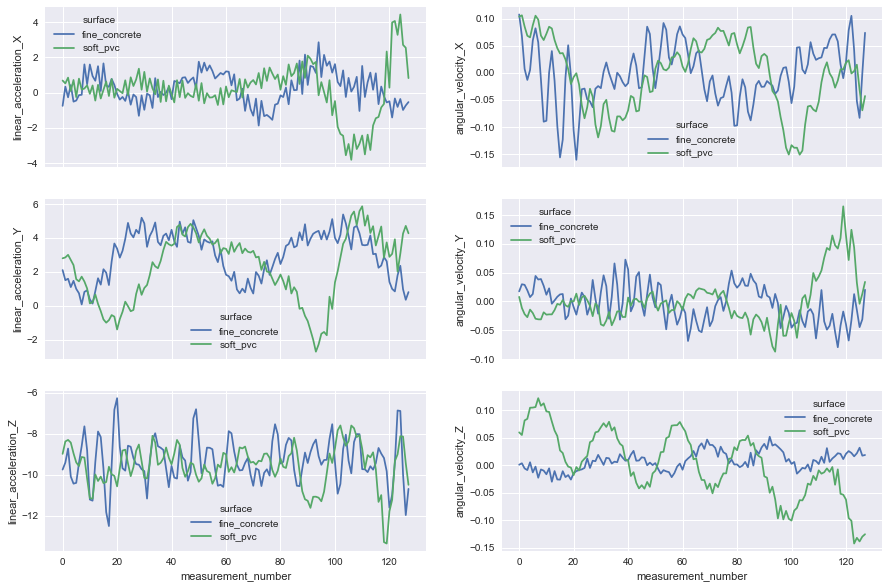

In [46]:
# Plot example data
f, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True)

# Linear Acceleration
sns.lineplot(data=example, x='measurement_number', y='linear_acceleration_X', hue='surface', ax=axes[0, 0])
sns.lineplot(data=example, x='measurement_number', y='linear_acceleration_Y', hue='surface', ax=axes[1, 0])
sns.lineplot(data=example, x='measurement_number', y='linear_acceleration_Z', hue='surface', ax=axes[2, 0])
# Angular Velocity
sns.lineplot(data=example, x='measurement_number', y='angular_velocity_X', hue='surface', ax=axes[0, 1])
sns.lineplot(data=example, x='measurement_number', y='angular_velocity_Y', hue='surface', ax=axes[1, 1])
sns.lineplot(data=example, x='measurement_number', y='angular_velocity_Z', hue='surface', ax=axes[2, 1])

# Show plot
plt.show()

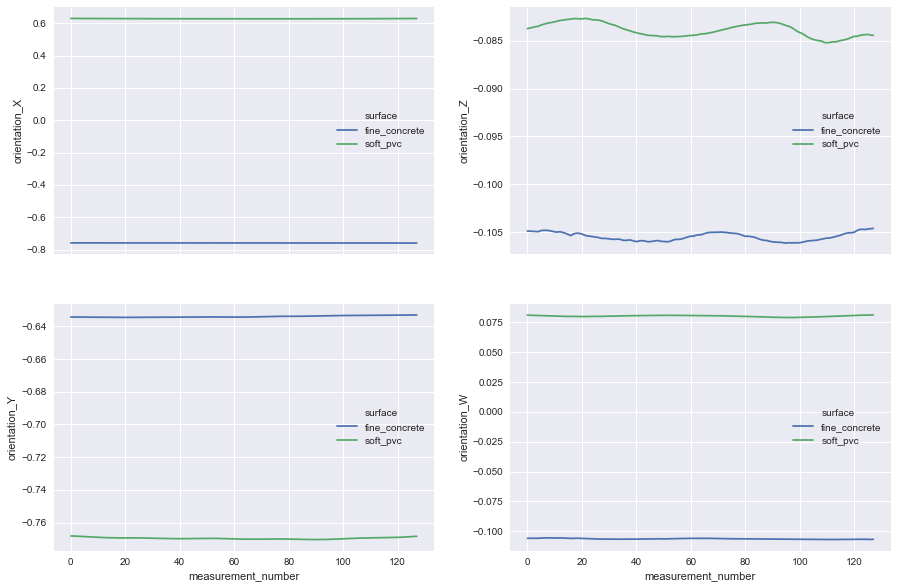

In [47]:
# Plot example data
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Orientation
sns.lineplot(data=example, x='measurement_number', y='orientation_X', hue='surface', ax=axes[0, 0])
sns.lineplot(data=example, x='measurement_number', y='orientation_Y', hue='surface', ax=axes[1, 0])
sns.lineplot(data=example, x='measurement_number', y='orientation_Z', hue='surface', ax=axes[0, 1])
sns.lineplot(data=example, x='measurement_number', y='orientation_W', hue='surface', ax=axes[1, 1])


# Show plot
plt.show()

So, basically blue and green... and a lot of stuff going on. Although not so much in terms of rotation.  

What about the whole data set?

In [48]:
# Group data by 'surface' -> result: multiple time series for each surface type

# Descriptive stats on each set of time series

### Solution Approach

* What kind of problem?
* Which solutions could be used?